<a href="https://colab.research.google.com/github/faalmeda/strokekening/blob/main/strokedata_model2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, transforms, datasets
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np
from torch.utils.data import Dataset
import os
from PIL import Image
from torchvision import transforms

In [11]:
import os
print(os.path.exists('/content/drive/MyDrive/Data/dataset_augmented4/train/normal/'))

True


In [14]:
import torch
from torchvision import transforms, datasets
from torch.utils.data import Dataset, DataLoader
import os
from PIL import Image

# ---Transformations---
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

test_transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

# ---Loader Dataset Class---
class StrokeDataset(Dataset):
    def __init__(self, root, transform=None):
        self.root = root
        self.transform = transform
        self.images = []
        self.labels = []

        for label, category in enumerate(['normal', 'stroke']):
            category_path = os.path.join(root, category)
            for img in os.listdir(category_path):
                self.images.append(os.path.join(category, img))
                self.labels.append(label) # 0 for normal, 1 for stroke

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_path = os.path.join(self.root, self.images[idx])
        label = self.labels[idx]
        img = Image.open(img_path).convert('L')

        if self.transform:
            img = self.transform(img)
        return img, label


# ---Local Directories used---
train_dir = '/content/drive/MyDrive/Data/dataset_augmented4/train/'
val_dir = '/content/drive/MyDrive/Data/dataset_split3/val/'
test_dir = '/content/drive/MyDrive/Data/dataset_split3/test/'

train_dataset = StrokeDataset(train_dir, transform=transform)
val_dataset = StrokeDataset(val_dir, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=0)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=0)

print(f"Training samples: {len(train_dataset)}")
print(f"Validation samples: {len(val_dataset)}")


Training samples: 20793
Validation samples: 462


In [20]:
import torch.nn as nn
from torchvision import models
import torch.optim as optim
from torchvision.models import resnet18, ResNet18_Weights

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = resnet18(weights=ResNet18_Weights.DEFAULT)
model.fc = nn.Linear(model.fc.in_features, 1)
model = model.to(device)

criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [ ]:
train_losses = []
val_losses = []
train_acc = []
val_acc = []
best_val_loss = float('inf')
trigger_times = 0
num_epochs = 100
patience = 3

for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    correct_train = 0
    total_train = 0


    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)


        optimizer.zero_grad()
        outputs = model(images).squeeze(1)
        loss = criterion(outputs, labels.float())
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

        predicted = torch.round(torch.sigmoid(outputs))
        correct_train += (predicted == labels).sum().item()
        total_train += labels.size(0)

    train_losses.append(train_loss / len(train_loader))
    train_acc.append(correct_train / total_train)

    model.eval()
    val_loss = 0
    correct_val = 0
    total_val = 0

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images).squeeze(1)
            loss = criterion(outputs, labels.float())
            print('4')
            val_loss += loss.item()

            predicted = torch.round(torch.sigmoid(outputs))
            correct_val += (predicted == labels).sum().item()
            total_val += labels.size(0)

    val_losses.append(val_loss / len(val_loader))
    val_acc.append(correct_val / total_val)

    current_val_loss = val_loss / len(val_loader)

    if current_val_loss < best_val_loss:
        best_val_loss = current_val_loss
        trigger_times = 0

    else:
        trigger_times += 1
        print(f"EarlyStop trigger # {trigger_times}")

        if trigger_times >= patience:
            print("Early stopped...")
            break

    print(f"Epoch {epoch+1}/{num_epochs} - Train Loss: {train_losses[-1]:.4f} - Val Loss: {val_losses[-1]:.4f} - Train Accuracy: {train_acc[-1]:.4f} - Val Accuracy: {val_acc[-1]:.4f}")

1
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2
3
2


In [ ]:
import torchvision.datasets as datasets
from torch.utils.data import DataLoader

all_preds = []
all_labels = []

test_dataset = datasets.ImageFolder(root=test_dir, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)

        outputs = model(images).squeeze()
        predicted = (outputs > 0.5).float()
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

test_accuracy = (correct / total * 100)
print(f"Test Accuracy: {test_accuracy:.2f}%")

Test Accuracy: 97.63%


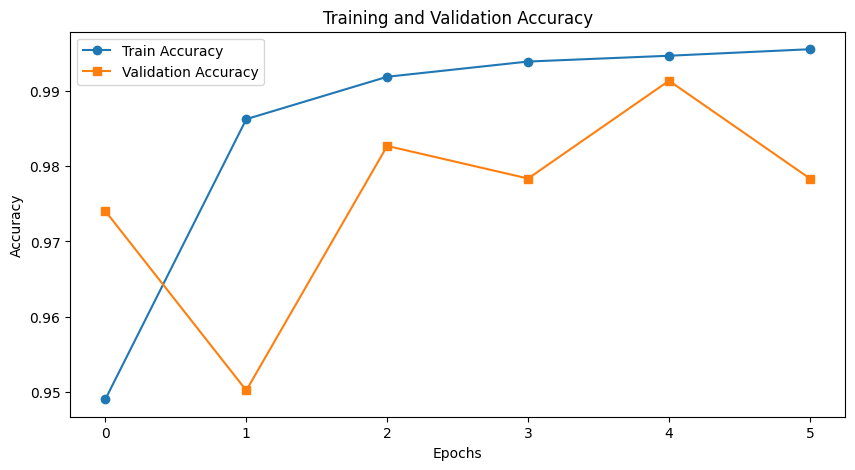

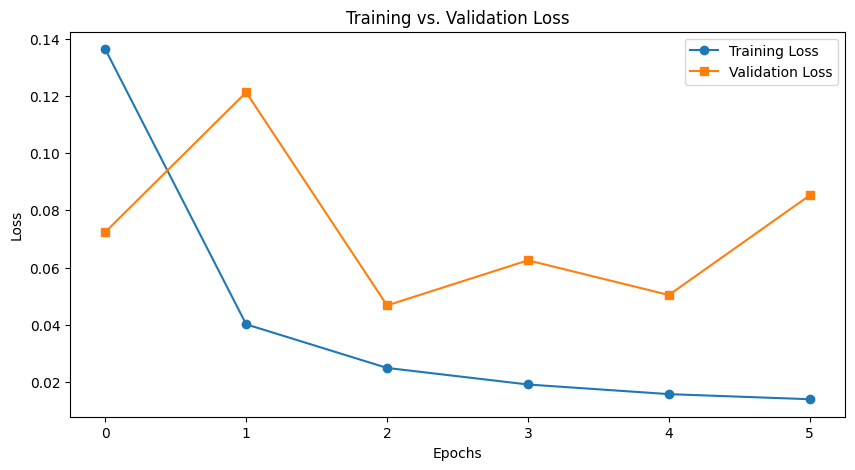

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(train_acc, label='Train Accuracy', marker='o')
plt.plot(val_acc, label='Validation Accuracy', marker='s')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(train_losses, label="Training Loss", marker="o")
plt.plot(val_losses, label="Validation Loss", marker="s")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training vs. Validation Loss")
plt.show()

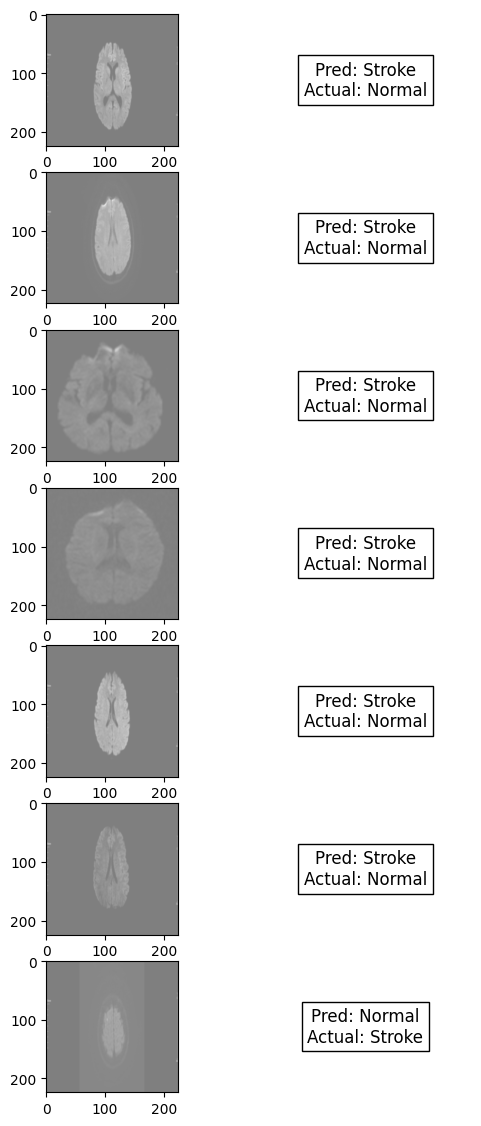

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

misclassified = []
model.eval()

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)

        outputs = model(images).squeeze()
        predicted = (outputs > 0.5).float()  # Convert probabilities to 0 or 1

        # Store incorrect predictions
        for i in range(len(images)):
            if predicted[i] != labels[i]:  # Only store incorrect ones
                if len(misclassified) < 20:  # Limit to 20 images
                    img = images[i].cpu().numpy().transpose(1, 2, 0)
                    img = (img * 0.5) + 0.5  # Undo normalization

                    misclassified.append((img, predicted[i].item(), labels[i].item()))
                else:
                    break
        if len(misclassified) >= 20:
            break


df = pd.DataFrame(misclassified, columns=["Image", "Predicted", "Actual"])
label_map = {0: "Normal", 1: "Stroke"}
df["Predicted"] = df["Predicted"].map(label_map)
df["Actual"] = df["Actual"].map(label_map)

# Misclassified images
fig, ax = plt.subplots(nrows=len(df), ncols=2, figsize=(6, len(df) * 2))

for i, (image, pred, actual) in enumerate(zip(df["Image"], df["Predicted"], df["Actual"])):
    ax[i, 0].imshow(image, cmap="gray")
    ax[i, 1].text(0.5, 0.5, f"Pred: {pred}\nActual: {actual}",
                  fontsize=12, ha="center", va="center",
                  bbox=dict(facecolor="white", edgecolor="black"))
    ax[i, 1].axis("off")

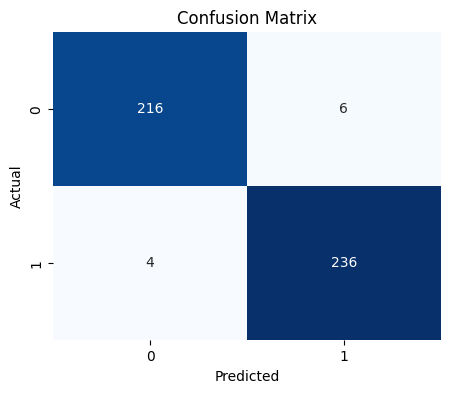

In [ ]:
import torch
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


model.eval()
all_preds = []
all_labels = []


with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)

        outputs = model(images).squeeze(1)
        predicted = torch.round(torch.sigmoid(outputs))  # for binary classification

        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())


cm = confusion_matrix(all_labels, all_preds)

# Confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
torch.save(model, "resnet_model2.pth")